In [2]:
!pip install fredapi

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
plt.style.use('seaborn')
plt.style.use('seaborn-bright')
plt.style.use('seaborn-poster')
%matplotlib inline
from fredapi import Fred

<ipython-input-8-7a051176e72f>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-8-7a051176e72f>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')
<ipython-input-8-7a051176e72f>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.sty

In [9]:
fred_api = Fred(api_key='7f85962fb812f6f3075094a3868067ed')
fred_df = {}
fred_df['Gross_Domestic_Product'] = fred_api.get_series('GDP', observation_start='1968-01-01', observation_end='2023-07-11')
fred_df['Unemployment_Rate'] = fred_api.get_series('UNRATE', observation_start='1968-01-01', observation_end='2023-07-11')
fred_df['Federal_Minimum_Wage'] = fred_api.get_series('STTMINWGFG', observation_start='1968-01-01', observation_end='2023-07-11')
fred_df['Federal_Funds_Rate'] = fred_api.get_series('FEDFUNDS', observation_start='1968-01-01', observation_end='2023-07-11')
fred_df['Labor_Force_Participation_Rate'] = fred_api.get_series('CIVPART', observation_start='1968-01-01', observation_end='2023-07-11')
fred_df['Consumer_Price_Index'] = fred_api.get_series('CPALTT01USM657N', observation_start='1968-01-01', observation_end='2023-07-11')
fred_df['Personal_Consumption_Expenditures'] = fred_api.get_series('PCE', observation_start='1968-01-01', observation_end='2023-07-11')
fred_df['Breakeven_Inflation_Rate_10Yr'] = fred_api.get_series('T10YIEM', observation_start='1968-01-01', observation_end='2023-07-11')
fred_df['Breakeven_Inflation_Rate_5Yr'] = fred_api.get_series('T5YIEM', observation_start='1968-01-01', observation_end='2023-07-11')
fred_df['Moody\'s_AAA_Bond_Yield'] = fred_api.get_series('AAA', observation_start='1968-01-01', observation_end='2023-07-11')
fred_df['Moody\'s_BBB_Bond_Yield'] = fred_api.get_series('BAA', observation_start='1968-01-01', observation_end='2023-07-11')
fred_df['M1'] = fred_api.get_series('M1SL', observation_start='1968-01-01', observation_end='2023-07-11')
fred_df['M2'] = fred_api.get_series('M2SL', observation_start='1968-01-01', observation_end='2023-07-11')
fred_df = pd.DataFrame(fred_df)
for col in fred_df.columns:
  fred_df[col] = fred_df[col].fillna(method='ffill')
fred_df = fred_df.to_period().resample('H').ffill()
fred_df.index = fred_df.index.to_timestamp()
print('Done.')

Done.


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

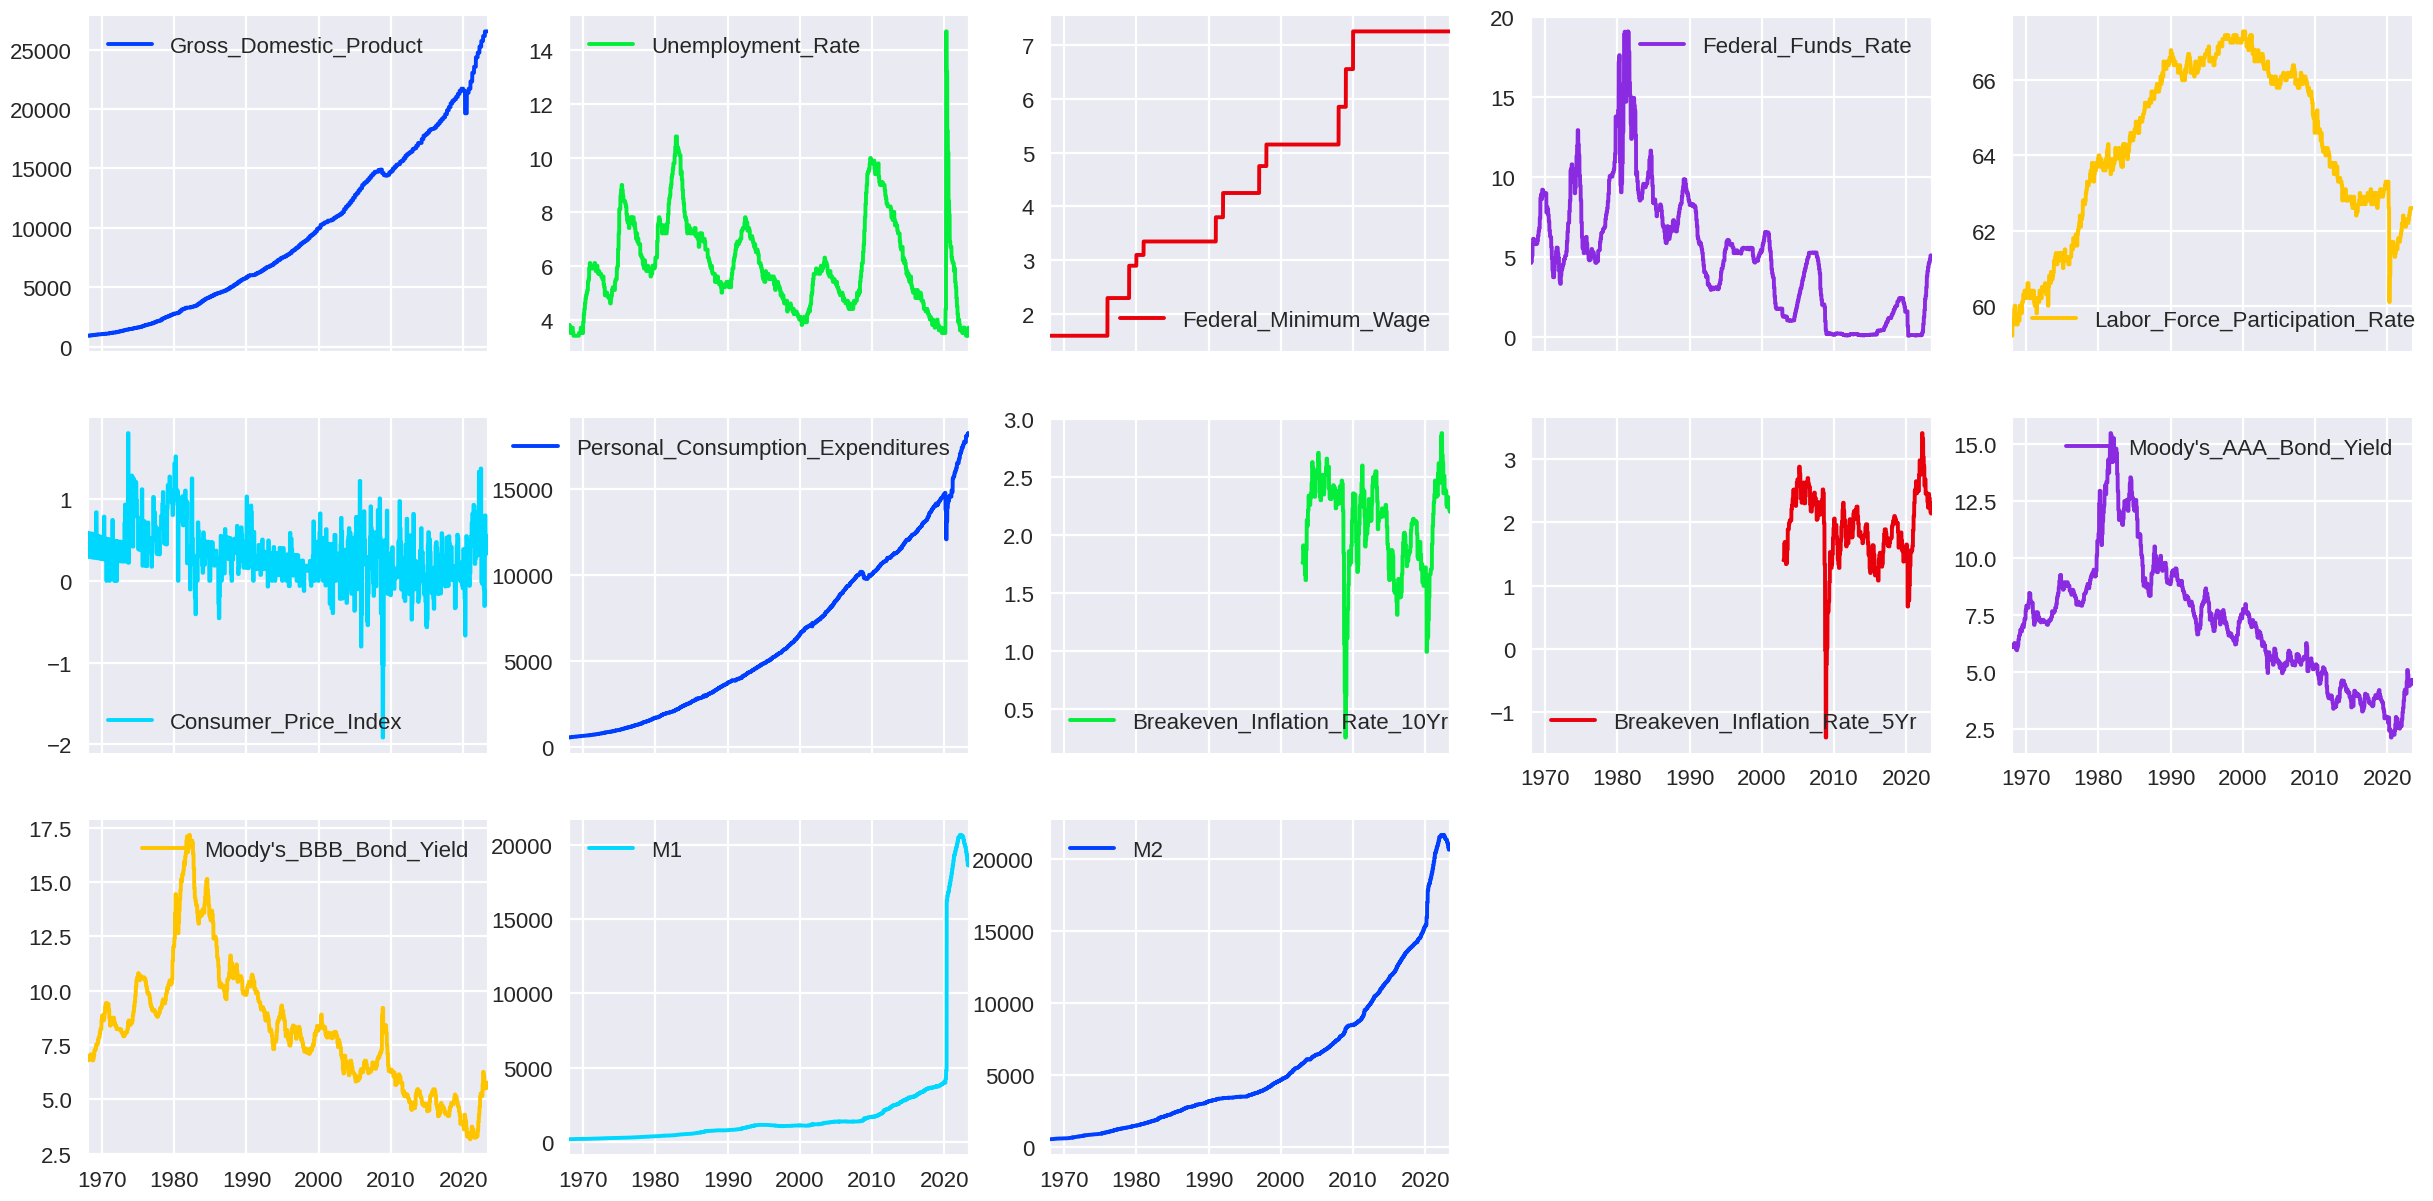

In [10]:
fred_df
fred_df.plot(subplots=True, layout=(4,5), figsize=(30, 20))

In [ ]:
df=fred_df.iloc[:, [0,2,3]]

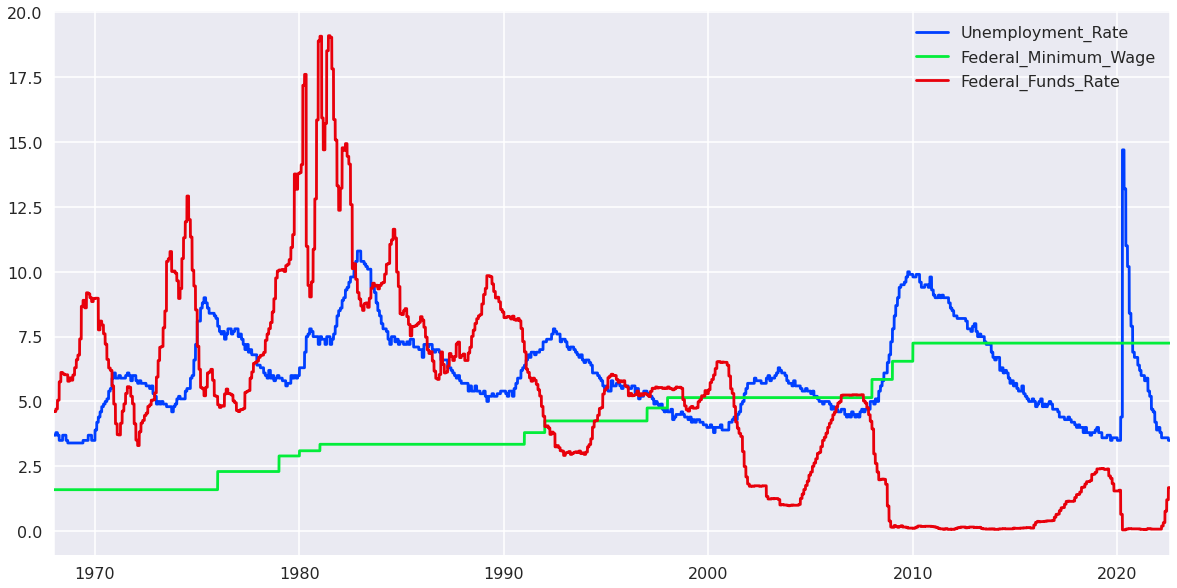

In [ ]:
ax = df.plot(figsize=(20, 10));

In [ ]:
fred

1968-01-01 00:00:00      909.387
1968-01-01 01:00:00      909.387
1968-01-01 02:00:00      909.387
1968-01-01 03:00:00      909.387
1968-01-01 04:00:00      909.387
                         ...    
2022-07-31 19:00:00    24851.809
2022-07-31 20:00:00    24851.809
2022-07-31 21:00:00    24851.809
2022-07-31 22:00:00    24851.809
2022-07-31 23:00:00    24851.809
Freq: H, Name: Gross_Domestic_Product, Length: 478464, dtype: float64

In [ ]:
fred = fred_df.loc[:,1]

KeyError: ignored